In [16]:
from lxh_prediction.plot import plot_curve, plt
from lxh_prediction.curves_auc import auROCNonLab, auPRNonLab


[0.69207881 0.72471974 0.7121828  0.68584302 0.71013083]
[0.69727118 0.72127428 0.72199206 0.67950678 0.70316775]
[0.61969438 0.63653586 0.62435167 0.6191834  0.62778134]
[0.62515513 0.62952613 0.61925092 0.62675336 0.62270166]
[0.62072603 0.64594617 0.61522802 0.62527658 0.61965288]


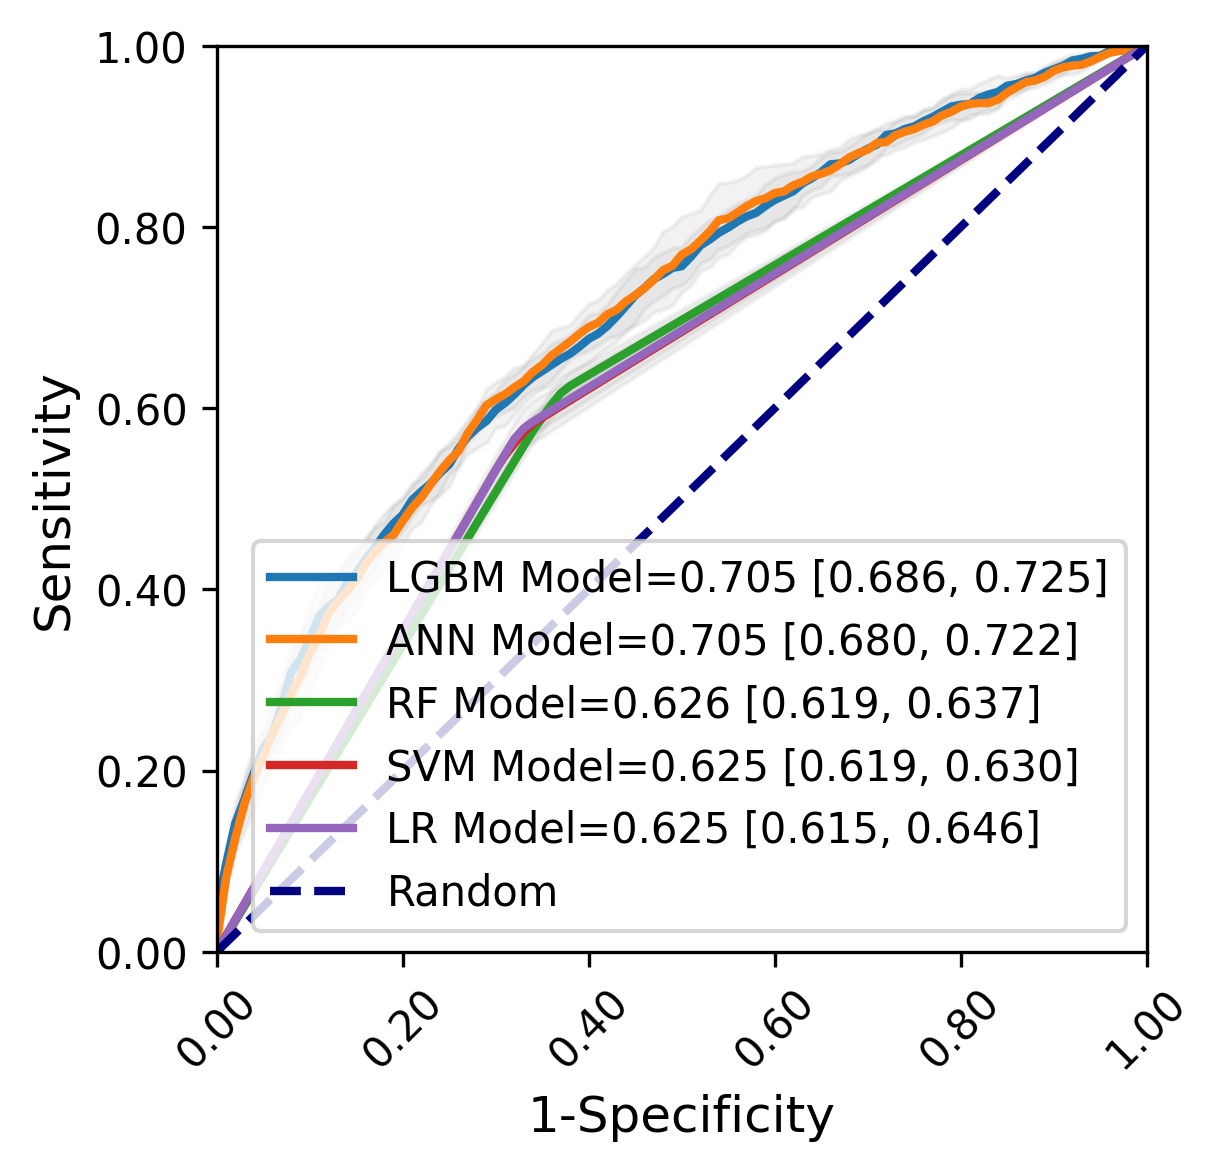

In [17]:
# Figure 3a AUC

exp = auROCNonLab(retrain=False)
exp.run("LGBM Model", "LightGBMModel", "full_non_lab")
exp.run("ANN Model", "ANNModel", "full_non_lab")
exp.run("RF Model", "RandomForestModel", "full_non_lab")
exp.run("SVM Model", "SVMModel", "full_non_lab")
exp.run("LR Model", "LogisticRegressionModel", "full_non_lab")

exp.plot()
plot_curve(
    (0, 1),
    (0, 1),
    ylim=(0, 1),
    xlabel="1-Specificity",
    ylabel="Sensitivity",
    color="navy",
    lw=2,
    linestyle="--",
    name="Random",
)

exp.save("figure3a_auc")


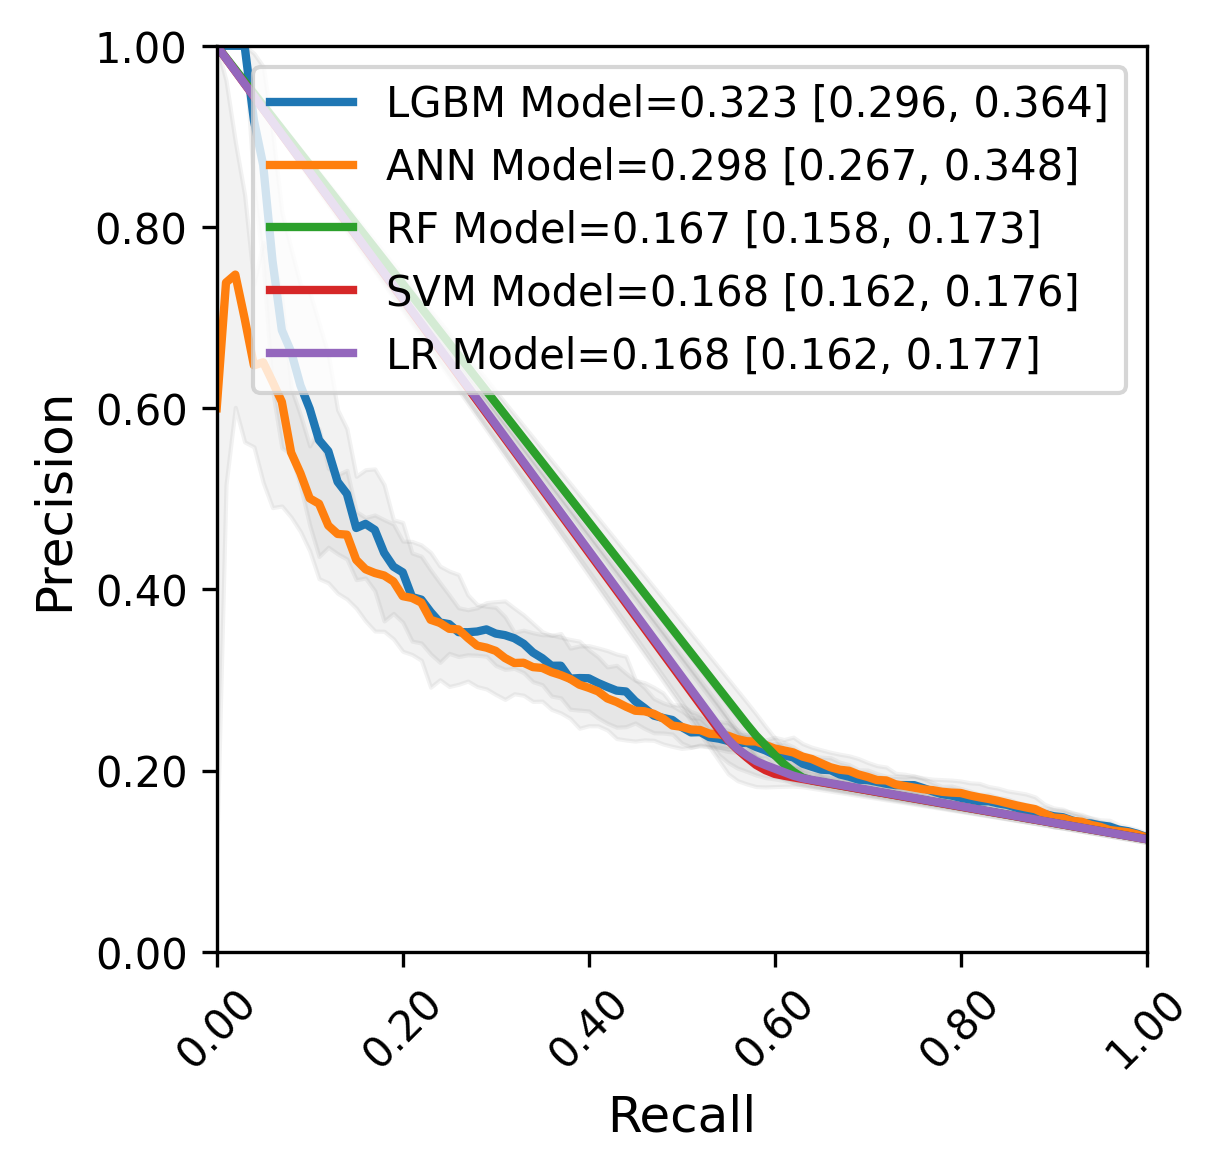

In [18]:
# Figure 3a auPR

exp = auPRNonLab(retrain=False)
exp.run("LGBM Model", "LightGBMModel", "full_non_lab")
exp.run("ANN Model", "ANNModel", "full_non_lab")
exp.run("RF Model", "RandomForestModel", "full_non_lab")
exp.run("SVM Model", "SVMModel", "full_non_lab")
exp.run("LR Model", "LogisticRegressionModel", "full_non_lab")

exp.plot()
plt.legend(loc="upper right")

exp.save("figure3a_auPR")


[0.69207881 0.72471974 0.7121828  0.68584302 0.71013083]
[0.69334161 0.72412407 0.71522996 0.6838399  0.70371235]
[0.69058641 0.72956975 0.71502412 0.68531333 0.70414349]
[0.69182594 0.72726193 0.71374204 0.67850773 0.70199751]
[0.6855135  0.71416691 0.7108051  0.68197255 0.69012331]
[0.684713   0.70041925 0.70625705 0.6897202  0.68283282]


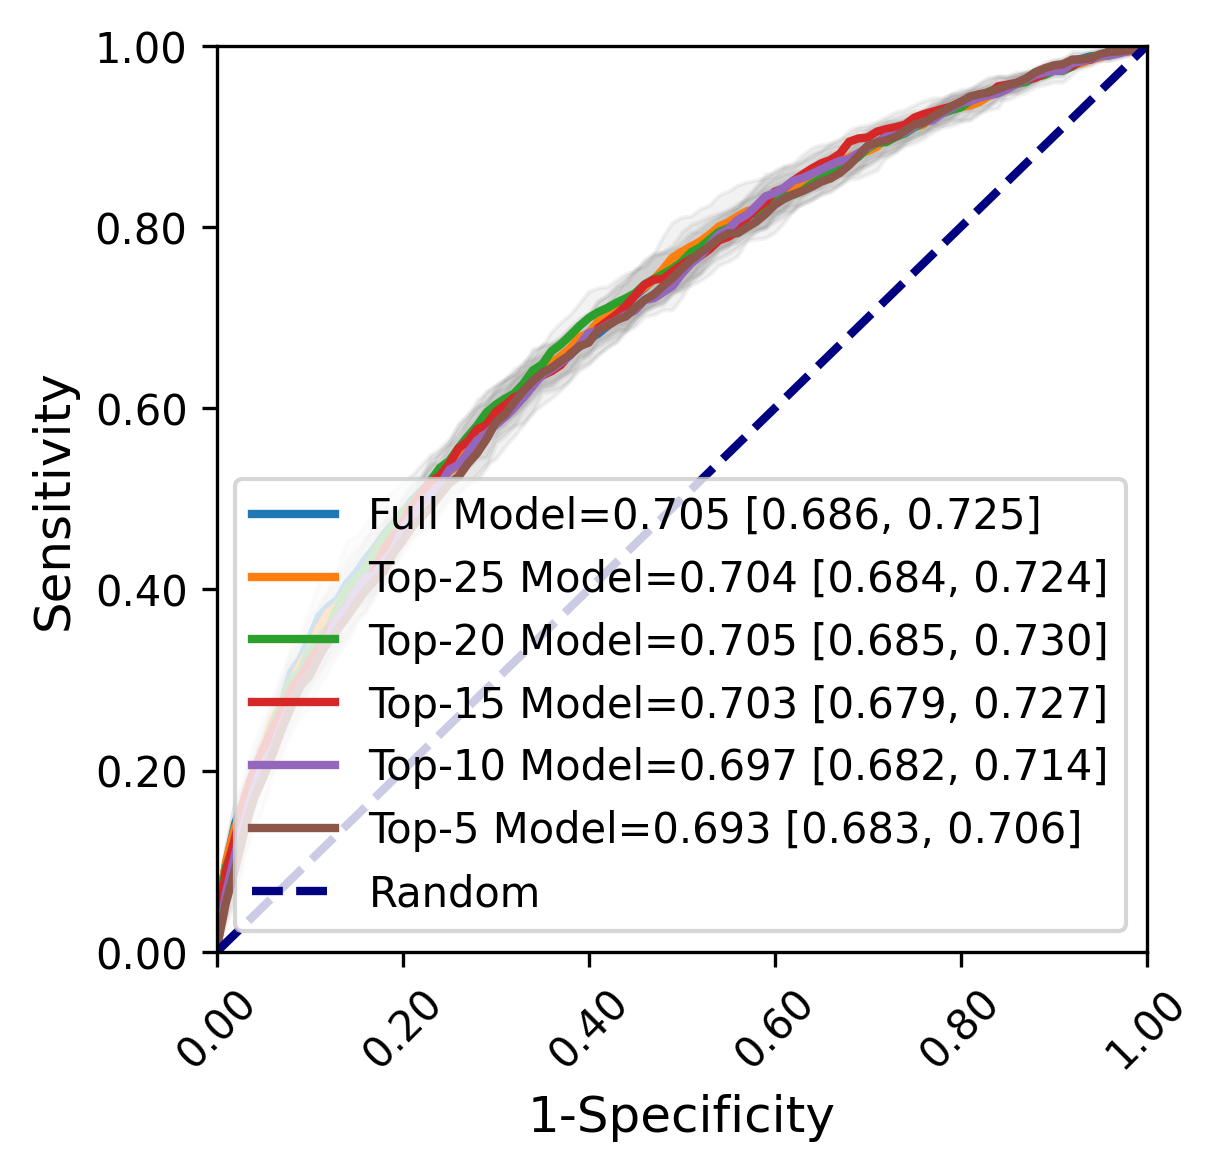

In [9]:
# Figure 3b AUC

exp = auROCNonLab(retrain=False)
exp.run("Full Model", "LightGBMModel", "full_non_lab")
exp.run("Top-25 Model", "LightGBMModel", "top25_non_lab")
exp.run("Top-20 Model", "LightGBMModel", "top20_non_lab")
exp.run("Top-15 Model", "LightGBMModel", "top15_non_lab")
exp.run("Top-10 Model", "LightGBMModel", "top10_non_lab")
exp.run("Top-5 Model", "LightGBMModel", "top5_non_lab")
exp.plot()
plot_curve(
    (0, 1),
    (0, 1),
    ylim=(0, 1),
    xlabel="1-Specificity",
    ylabel="Sensitivity",
    color="navy",
    lw=2,
    linestyle="--",
    name="Random",
)

exp.save("figure3b_auc")


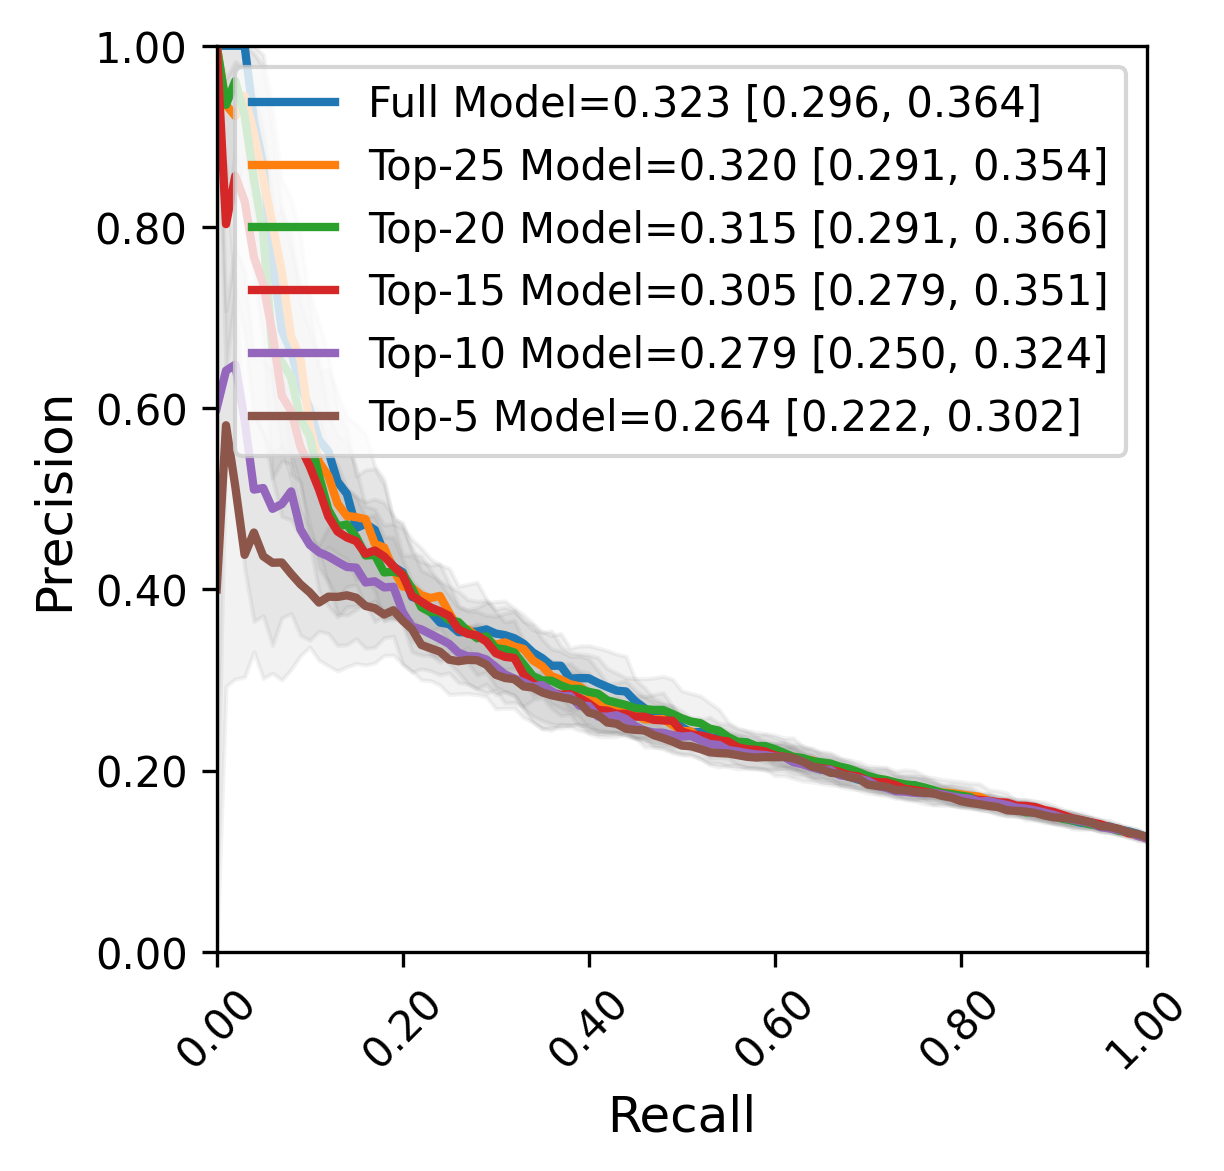

In [10]:
# Figure 3b auPR

exp = auPRNonLab(retrain=False)
exp.run("Full Model", "LightGBMModel", "full_non_lab")
exp.run("Top-25 Model", "LightGBMModel", "top25_non_lab")
exp.run("Top-20 Model", "LightGBMModel", "top20_non_lab")
exp.run("Top-15 Model", "LightGBMModel", "top15_non_lab")
exp.run("Top-10 Model", "LightGBMModel", "top10_non_lab")
exp.run("Top-5 Model", "LightGBMModel", "top5_non_lab")

exp.plot()
plt.legend(loc="upper right")

exp.save("figure3b_auPR")


### Figure 3c Feature ranking using Shap

Found `num_boost_round` in params. Will use it instead of argument
Found `early_stopping_round` in params. Will use it instead of argument
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


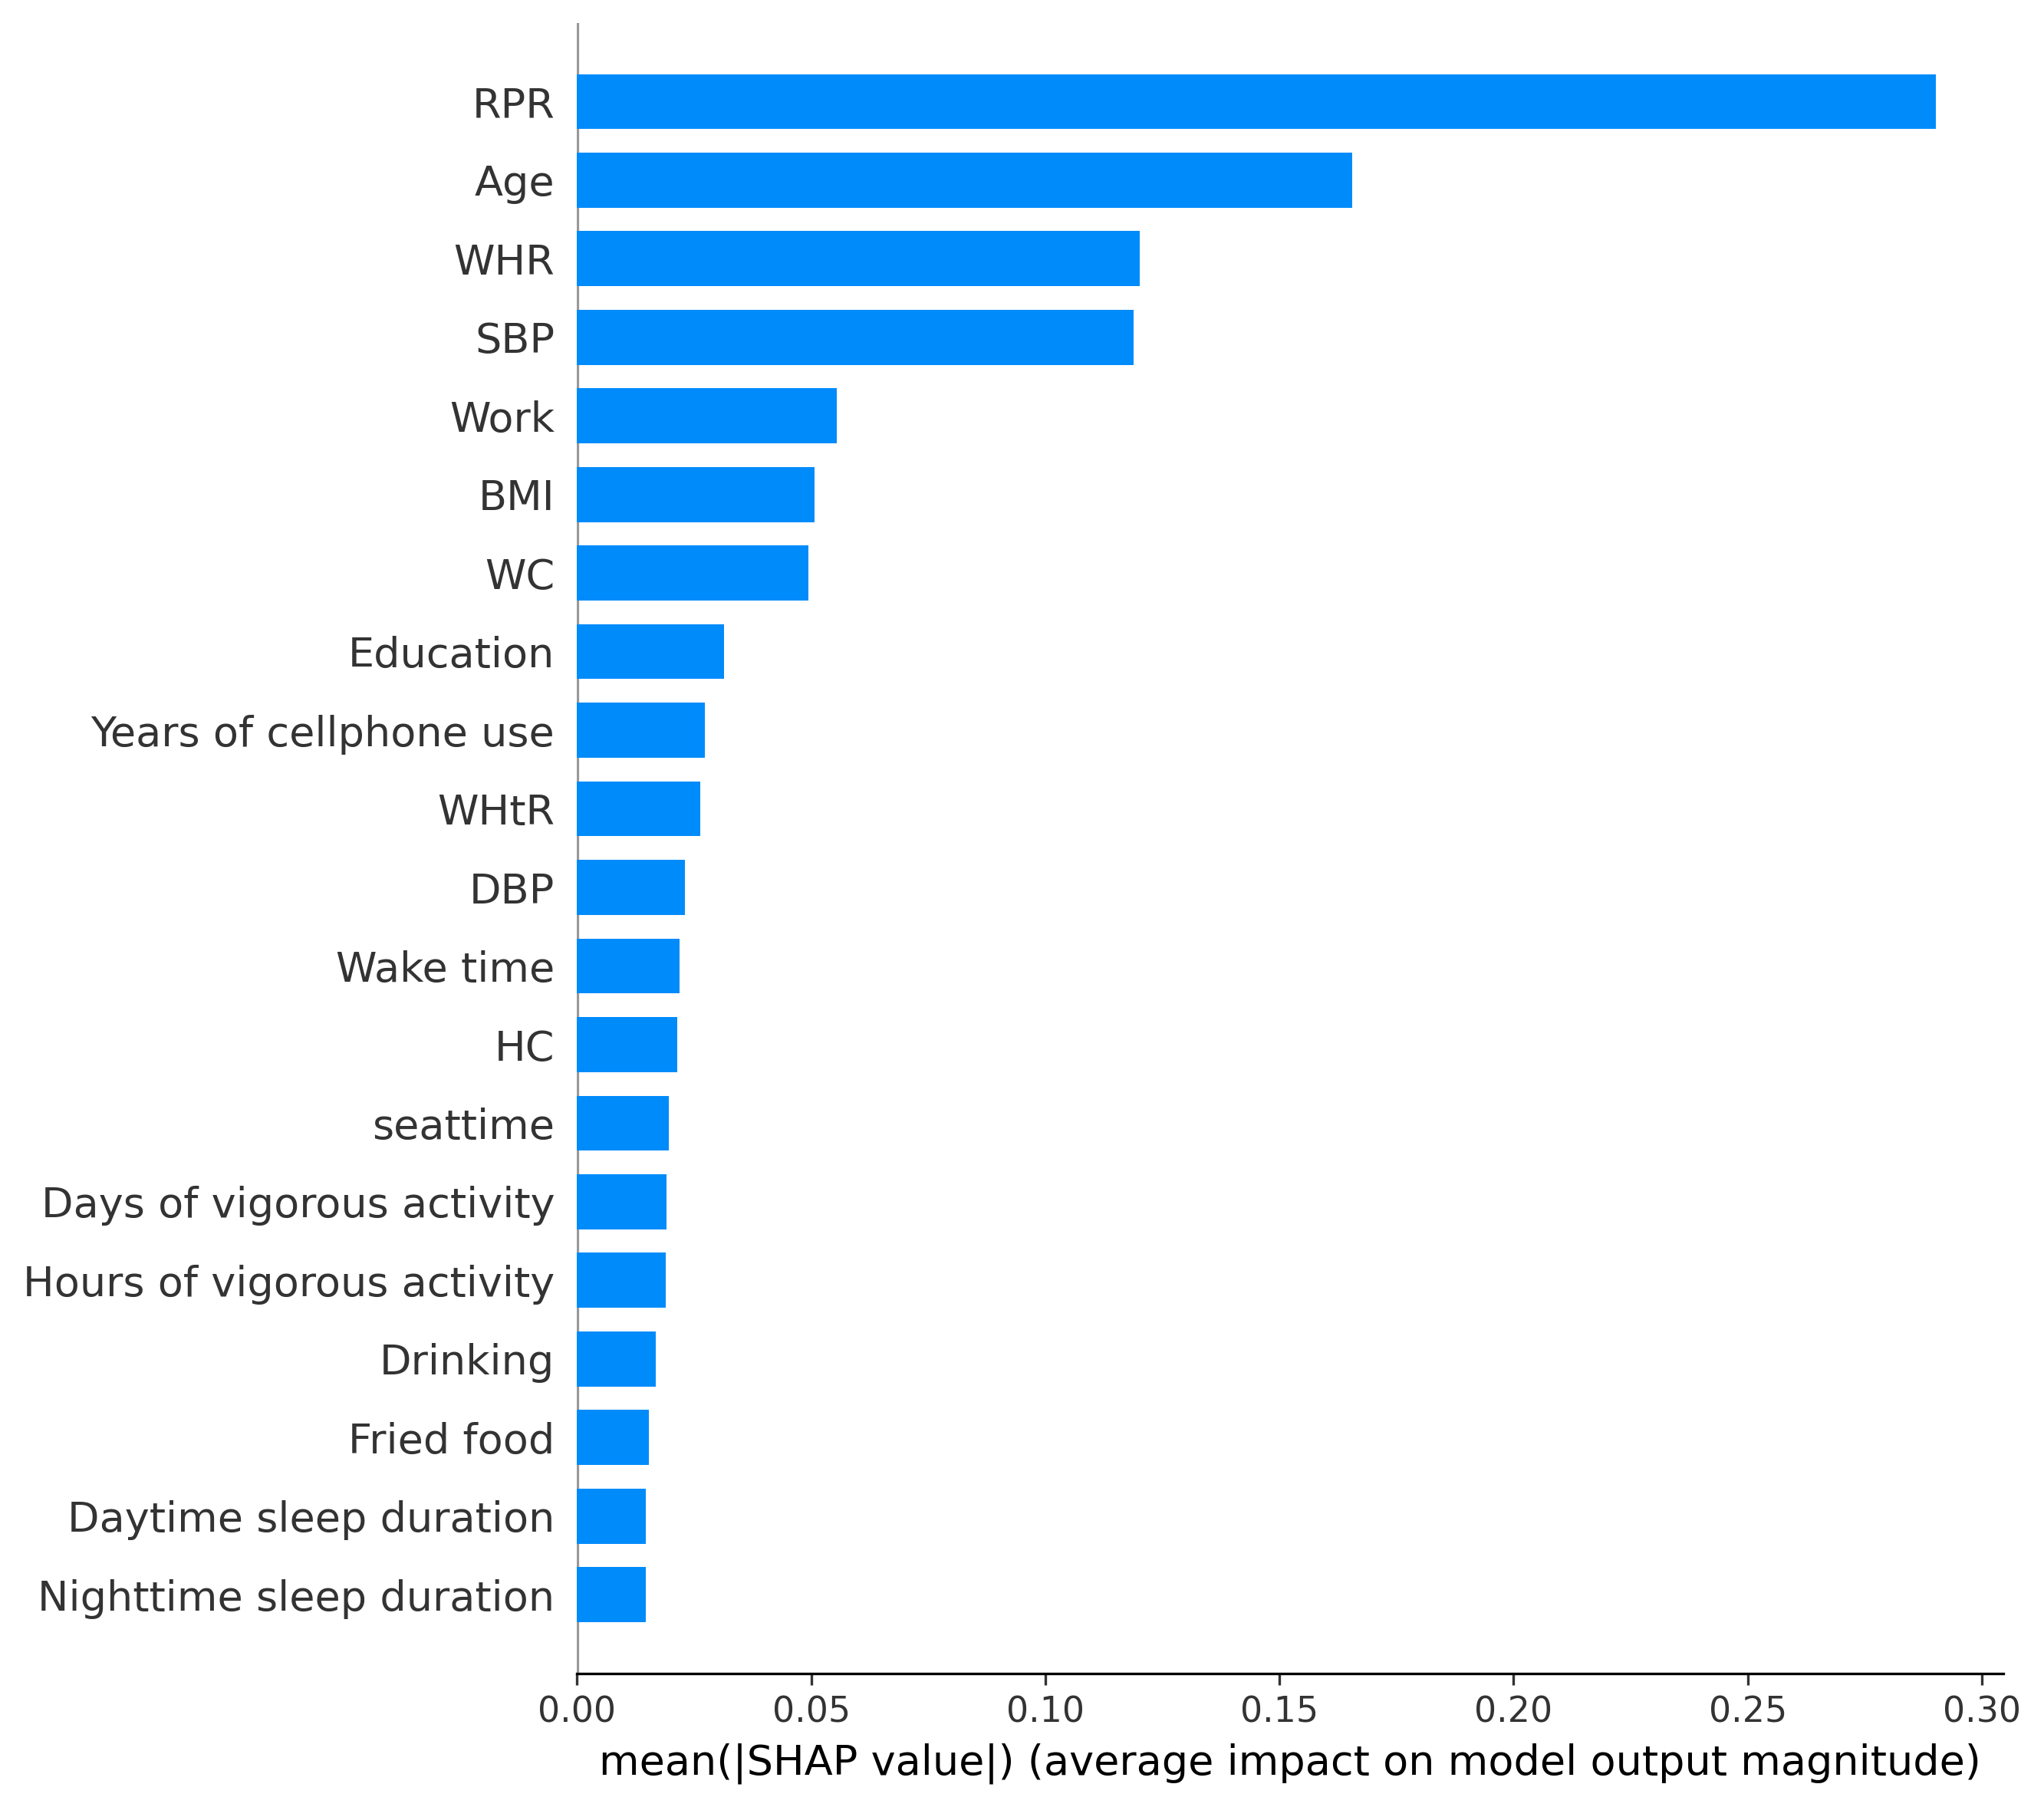

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import shap

from lxh_prediction.explain_model import explain_with_shape_lgbm


feat_collection = "full_non_lab"
explainer, X, feature_names = explain_with_shape_lgbm(feat_collection)

shap_values = explainer.shap_values(X)[1]
expected_value = explainer.expected_value[1]

fig = plt.figure(figsize=(4, 4), dpi=300)
shap.summary_plot(
    shap_values, X, max_display=20, plot_type="bar", feature_names=feature_names,
)


### Figure 3 d-f

In [2]:
import pandas as pd

# Reload data for Top20 features only
feat_collection = "top20_non_lab"
explainer, X, feature_names = explain_with_shape_lgbm(feat_collection)

shap_values = explainer.shap_values(X)[1]
expected_value = explainer.expected_value[1]


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


shap_v = pd.DataFrame(shap_values, columns=X.columns)
phi0 = expected_value

RR = sigmoid(shap_v + phi0) / sigmoid(phi0)


Text(0, 0.5, 'Relative Risk for diabetes')

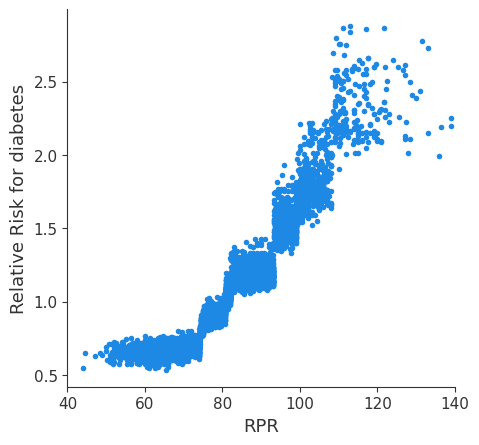

In [3]:
name = "RPR"
fig = plt.figure(figsize=(5, 5), dpi=100)
plt.xlim((40, 140))
shap.dependence_plot(
    name,
    RR.values,
    X,
    display_features=X,
    interaction_index=None,
    feature_names=feature_names,
    ax=fig.gca(),
    show=False,
)
fig.gca().set_ylabel("Relative Risk for diabetes")


Text(0, 0.5, 'Relative Risk for diabetes')

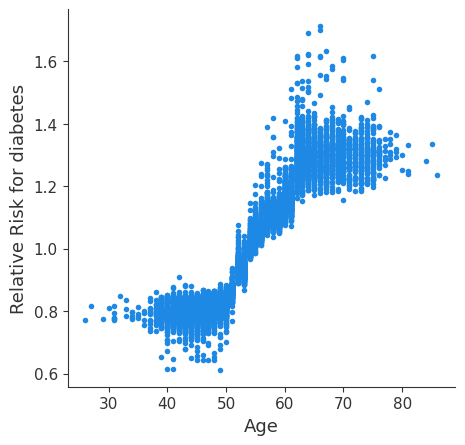

In [4]:
name = "Age"
fig = plt.figure(figsize=(5, 5), dpi=100)
shap.dependence_plot(
    name,
    RR.values,
    X,
    display_features=X,
    interaction_index=None,
    feature_names=feature_names,
    ax=fig.gca(),
    show=False,
)
fig.gca().set_ylabel("Relative Risk for diabetes")


Text(0, 0.5, 'Relative Risk for diabetes')

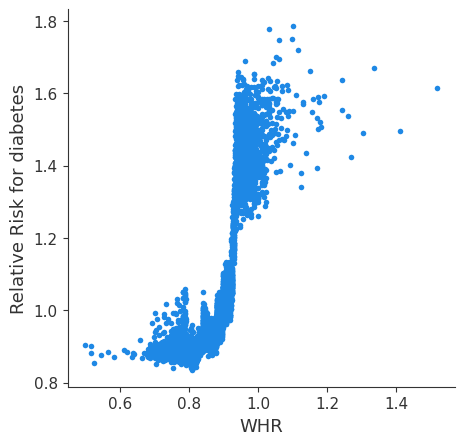

In [5]:
name = "WHR"
fig = plt.figure(figsize=(5, 5), dpi=100)
shap.dependence_plot(
    name,
    RR.values,
    X,
    display_features=X,
    interaction_index=None,
    feature_names=feature_names,
    ax=fig.gca(),
    show=False,
)
fig.gca().set_ylabel("Relative Risk for diabetes")
